# **What is Natural Language Processing (NLP)**

**Natural Language Processing (NLP);** It is an area where studies are carried out to try to make computers use language in a similar way to humans.

A text classification process is quite similar to the data science process. Just as there is data pre-processing after the data acquisition phase in the data science process, **text pre-processing** processes also take place in the **text classification** process. These steps are followed by **text visualization** processes and the application of analyzes on the relevant subject. In addition, if there is a machine learning process, it consists of **feature engineering** and **modeling processes**.

# **Business Problem**

**"KOSMOS"**, which sells through Amazon and produces home textiles and daily wear, aims to increase its sales by analyzing the comments on its products and improving their features according to the complaints it receives. In line with this goal, the comments will be labeled by sentiment analysis and a classification model will be created with the labeled data.

# **Data-Set Story**

The data set consists of variables that indicate the comments made on a particular product group, the comment title, the number of stars, and how many people found the comment useful.

* **Review:** Comment on the product.

* **Title:** Title given to the comment content, short comment.

* **HelpFul**: Number of people who found the comment helpful.

* **Star:** Number of stars given to the product.

# **Tasks**

**Task 1:** Text preprocessing operations.

 Step 1: Read the amazon.xlsx data.

 Step 2: On the "Review" variable
  * Convert all letters to lowercase
  * Remove punctuation marks
  * Remove numerical expressions in comments
  * Remove words that do not contain information (stopwords) from the data
  * Remove words occurring less than 1000 times from the data
  * Apply the lemmatization process

**Task 2:** Text Visualization

Step 1: Barplot visualization process

* Calculate the frequencies of the words contained in the "Review" variable and save them as tf.
* Rename the columns of the tf dataframe: "words" to "tf"
* Complete the visualization process with barplot by filtering the "tf" variable for values ​​greater than 500.

Step 2: WordCloud visualization process
* Save all the words contained in the "Review" variable as a string named "text"
* Determine and save your template shape using WordCloud
* Generate the wordcloud you saved with the string you created in the first step.
* Complete the visualization steps. (figure, imshow, axis, show)

**Task 3:** Sentiment Analysis

Step 1: Create the SentimentIntensityAnalyzer object defined in the NLTK package in Python

Step 2: Examining polarity scores with the SentimentIntensityAnalyzer object

* Calculate polarity_scores() for the first 10 observations of the "Review" variable
* Observe again by filtering according to compound scores for the first 10 observations examined.
* If the compound scores for 10 observations are greater than 0, update it as "pos", otherwise "neg"
* Assign pos-neg to all observations in the "Review" variable and add it to the dataframe as a new variable.


**Task 4:** Preparing for machine learning

Step 1: Separate the data as a train test by determining the dependent and independent variables.

Step 2: In order to give data to the machine learning model, we need to convert the representation forms into numerical ones.

* Create an object using TfidfVectorizer.
* Fit the object we created using the train data we allocated before.
* Apply the transform operation to the train and test data of the vector we created and save it.

**Task 5:** Modeling (Logistic Regression)

Step 1: Build the logistic regression model and fit it with the train data.

Step 2: Make predictions with the model you have created.

* Predict and save the test data with the Predict function.
* Report and observe your prediction results with classification_report.
* Calculate the average accuracy value using the cross validation function.

Step 3: Ask the model by choosing randomly from the comments in the series.

* Select the sample from the "Review" variable with the sample function and assign it to a new value.
* Vectorize the sample you obtained with CountVectorizer so that the model can predict it.
* Save the vectorized sample by performing fit and transform operations.
* Record the prediction result by giving the sample to the model you have established.
* Print the sample and prediction result on the screen.

**Task 6:** Modeling (Random Forest)

Step 1: Observing the prediction results with the Random Forest model;

* Build and fit the RandomForestClassifier model.
* Calculate the average accuracy value using the cross validation function
* Compare the results with the logistic regression model.

# **Text Pre-processing**

We must standardize the texts. In texts where some letters are uppercase and some are lowercase, the first action may be to reduce or enlarge the entire text. This process is called **normalization**. There may also be variables that we would like to exclude from the study. For example: we may want to delete expressions that do not carry any measurement value, such as **numbers**, **punctuation marks** or **stop words** that are commonly used in the language ("is", "that", "for" ...).

**Note:** Studies in the field of natural language processing are as closed to generalizations as possible. It may be necessary to keep some expressions in the text within the scope of the subject of interest.

Let's get started, first we include the libraries we use throughout the project.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from textblob import Word, TextBlob
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

To avoid seeing some "warning" outputs;

In [42]:
from warnings import filterwarnings
filterwarnings('ignore')

Let's set certain display options using the Pandas library.

In [43]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Let's read our relevant dataset and create a pandas dataframe.

In [44]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/amazon.xlsx", engine='openpyxl')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
df.shape

(5611, 4)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Star     5611 non-null   int64 
 1   HelpFul  5611 non-null   int64 
 2   Title    5559 non-null   object
 3   Review   5593 non-null   object
dtypes: int64(2), object(2)
memory usage: 175.5+ KB


In [47]:
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


Let's apply the normalization process.

In [48]:
df['Review'] = df['Review'].str.lower()

Let's continue by removing the **punctuation marks**. This can be done by writing **regular expression**. By hovering over the texts, we can inform them that a string expression is a punctuation mark and replace the points we capture with spaces.

**Regular expression** is a special structure used for pattern matching in textual expressions, that is, to capture and work on a certain pattern.

In [49]:
df['Review'] = df['Review'].str.replace('[^\w\s]', '')

Now let's continue with the **numbers**. Since the numbers are assumed to have no measurement value, they must be discarded.

**Note:** In terms of the features you will derive specifically for the work you are doing, features such as the abundance of numerical expressions in certain texts may have various distinctiveness.

In [50]:
df['Review'] = df['Review'].str.replace('\d', '')

**"Stop words"** refer to words that have no meaning and are commonly used in the language. It means deleting expressions such as "for", "is", "the", "or" ... since they do not have a measurement value.

In [51]:
import nltk
nltk.download('stopwords')
stopwords = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stopwords))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now we can deal with the removal of **rare words**. This process may not be included in the general NLP flow. When we focus on words to perform modeling operations, it is generally undesirable to keep rarely mentioned words in the study. Our aim is to exclude words that occur rarely in the relevant text, assuming that they will not form a certain pattern.

In [52]:
delete = pd.Series(' '.join(df['Review']).split()).value_counts()[-1000:]
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in delete))

For this part, we can finally deal with the process of separating words into their roots. For example, it is the elimination of the 's suffixes at the end of words. If we consider the issue from a Turkish perspective; It is the process of reducing the words "kitapçı", "kitaplık" and "kitaplar" to the word "kitap".

In [53]:
nltk.download('wordnet')
df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


As a result of these operations, let's examine the first 10 observations of our data set.

In [54]:
df.head(10)

,Star,HelpFul,Title,Review
0,5,0,looks great,happy
1,5,0,Pattern did not align between the two panels.,good quality material however panel mis-matched.
2,5,0,Imagery is stretched. Still fun.,product fun bedroom windows.<br />imagery bit ...
3,5,0,Que se ven elegantes muy finas,lo unico que gustaria e que sean un poco ma la...
4,5,0,Wow great purchase,great bang buck can't believe quality material...
5,5,0,Not for us,look different photo
6,5,0,Perfect for spa room,exactly looking for. heavy material. great pri...
7,5,0,Actually better than expected,"looking picture, thought curtain would thinner..."
8,4,0,Not what expected,much whiter thought would wasn’t really expect...
9,5,0,Pretty as a Picture,curtain picture shows. 3rd set ambesonne curta...


# **Text Visualization**

**Text visualization** operations are very important. Texts must first be represented numerically. In these processes, the frequencies of the words are calculated; **Column charts** and **word clouds** can be created. We can also use methods that can be used to visualize some categorical variables. First, let's create a **column chart**.

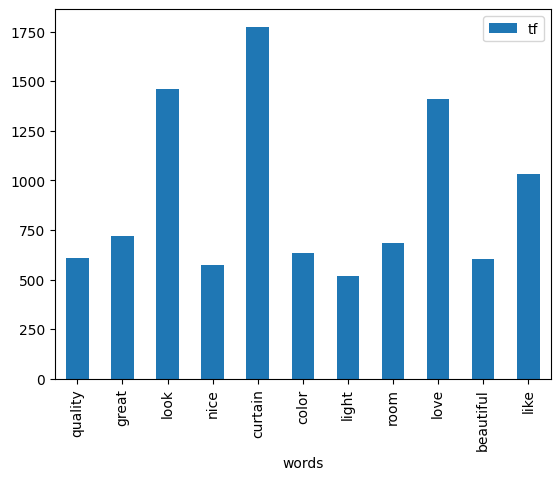

In [55]:
tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()

Let's create a **word cloud** as the final process for this part. Word cloud is the process of creating visuals in a cloud according to the frequency of occurrence of words in the relevant text. To achieve this, we must express the entire text in a single text file as a single text.

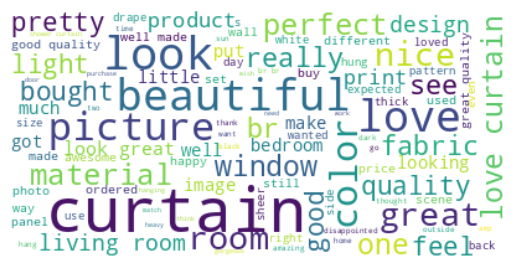

In [56]:
text = " ".join(i for i in df.Review)

wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# **Sentiment Analysis**

**Sentiment analysis** aims to express mathematically the emotional state of the texts we have. Let's imagine we have a sentence. Each word in it has positive, negative or neutral statuses. These meanings are evaluated holistically and evaluations are made as to whether the text is positive or negative.

First, let's create the **SentimentIntensityAnalyzer** object defined in the NLTK package in Python.

In [58]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Then let's follow step 2 given in the tasks section

In [60]:
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x))

df["Review"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

df["Review"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

df["Sentiment_Label"] = df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

In [61]:
df.groupby("Sentiment_Label")["Star"].mean()

Sentiment_Label
neg   3.455
pos   4.569
Name: Star, dtype: float64

**Note:** By tagging comments with SentimentIntensityAnalyzer, the dependent variable for the comment classification machine learning model was created.

# **Preparation for Sentiment Modeling**

Let's imagine that we have established a text classification model. Let's imagine that when various comments are asked to this model, we want to predict whether the comments are positive or negative. Here we move to a binary classification problem. This transition is very important. Here we have a binary classification problem that we want to model. We can perform polarity scoring with the **unsupervised learning** method. We create an independent variable by classifying those greater than a certain threshold as 1, and those less than a certain threshold as 0. Thus, we switch to **supervised learning**.

Before starting the modeling process, let's briefly talk about the **"Counts Vectors"** and **"TF-IDF"** methods to create numerical representations of our text.

## **Count Vectors**

We need to create independent variables of the texts we have. The most important stage of natural language processing studies is to represent texts numerically. In other words, it is the vectorization of words.

Some commonly used word vector creation methods are:

* Count Vectors: Frequency based
* TF-IDF Vectors: Normalized frequency bases
* Word Embeddings : (Word2Vec, GloVe, BERT ...)

These methods are for computers to apply mathematical operations to texts in the world of linear algebra.

**Count Vectors** method is the process of extracting the frequencies of words.

## **TF-IDF Method**

The TF-IDF method is a normalized, standardized word vector extraction method to eliminate some of the biases introduced by the Count Vectors method. It is a standardization process focusing on the frequency of occurrence of words in documents and the frequency of occurrence of words in the entire corpus.

The **TF-IDF** method uses the Count Vectors method to express texts numerically. The Count Vectors method may create biases in favor of words with high frequencies and against the other class. To eliminate the bias problem, the TF-IDF method first calculates the frequencies of all words and calculates the **TF-IDF score** by considering the weight of these frequencies in the documents and the weight of the words in the whole corpus.

## **Preparation**

Let's separate the data as a train test by determining the dependent and independent variables. Then, let's convert the representation shapes to numerical so that we can give the data to the Machine Learning model using **TfidfVectorizer**.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(df["Review"], df["Sentiment_Label"], random_state=5)

In [64]:
tf_idf_word_vectorizer = TfidfVectorizer().fit(X_train)
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(X_train)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(X_test)

# **Sentiment Modeling with Random Forests and Logistic Regression**

Let's perform the fit process with the training data by establishing the logistic regression model.

In [65]:
log_model = LogisticRegression().fit(x_train_tf_idf_word, y_train)

Let's make a prediction with the model we have built.

In [66]:
y_pred = log_model.predict(x_test_tf_idf_word)

In [70]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         neg       0.31      0.92      0.46        63
         pos       1.00      0.90      0.95      1340

    accuracy                           0.90      1403
   macro avg       0.65      0.91      0.70      1403
weighted avg       0.96      0.90      0.92      1403



Let's calculate the average accuracy value using the cross validation function.

In [71]:
cross_val_score(log_model, x_test_tf_idf_word, y_test, cv=10).mean()

0.8759827760891591

Let's ask the model again by selecting a random sample from the data. This time let's use the **Count Vectors** method. Let's show the prediction result by performing the fit and transform operations again.

In [74]:
random_review = pd.Series(df["Review"].sample(1).values)
new_comment = CountVectorizer().fit(X_train).transform(random_review)
pred = log_model.predict(new_comment)
print(f'Review:  {random_review[0]} \n Prediction: {pred}')

Review:  love curtains, make feel like i'm beach hawaii,i use living room dinning room. family room, there's nothing dislike,love them. 
 Prediction: ['pos']


Finally, let's build the Random Forests model and show the cross validation results.

In [75]:
rf_model = RandomForestClassifier().fit(x_train_tf_idf_word, y_train)

In [76]:
cross_val_score(rf_model, x_test_tf_idf_word, y_test, cv=10, n_jobs=-1).mean()

0.9016312056737588